In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno     

In [15]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/건설기계/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/건설기계/test.csv')

In [17]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data/건설기계/'

In [18]:
oil = pd.read_csv(file_path + 'train.csv')

In [19]:
oil

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,0,3059,0.0,0,13,78,NaN,NaN,NaN,NaN,NaN,NaN,888,NaN,0.0,27.0,1,14,16,1,16,6,1951,0,8504,21370,0,427,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,0,2978,0.0,0,0,31,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,NaN,0,1,0,0,1,0,572,2,19,1117,0,0,0,NaN,0,0.0,0.0,1.0,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,0,17,0.0,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,0.0,0.0,0,0,0,0,2,0,328,0,17,1334,0,0,1,NaN,0,0.0,0.0,0.0,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,0,1960,0.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,0.0,NaN,0,4,1,0,0,0,906,1,44,21774,2,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,0,71,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,0.0,0.0,0,0,0,0,2,0,309,0,217,18470,0,2,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,8,200,0,2,201,1,0,6,0.0,0,0,3,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN,0.0,1.0,0,0,0,0,8,0,477,0,35,22000,0,2,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,2,200,0,3,85,0,0,2945,0.0,0,0,2,13.0,8.0,0.0,16.0,21.0,9.1,12,0.0,0.0,4.0,0,36,0,224,3,0,1163,1,9,5494,0,5,0,0.4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14.5,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,9,550,0,6,0,1,0,13,0.0,0,4,7,NaN,NaN,NaN,NaN,NaN,NaN,415,NaN,0.0,NaN,1,16,7,10,3,1,1175,1,645,9640,2,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,19,550,0,2,4,0,0,2244,NaN,0,0,170,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,0.0,0.0,0,0,0,1,0,0,441,1,11,1313,0,0,0,NaN,0,0.0,0.0,0.0,7.0,8.0,100.0,1625.0,18890.0,0,NaN,44.3,652,0


In [21]:
oil_test = pd.read_csv(file_path + 'test.csv')
oil_test

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,TEST_6036,COMPONENT3,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163
6037,TEST_6037,COMPONENT3,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13
6038,TEST_6038,COMPONENT3,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13
6039,TEST_6039,COMPONENT2,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478


In [23]:
submission = pd.read_csv(file_path + 'sample_submission.csv')
submission

,ID,Y_LABEL
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
6036,TEST_6036,0
6037,TEST_6037,0
6038,TEST_6038,0
6039,TEST_6039,0


In [24]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

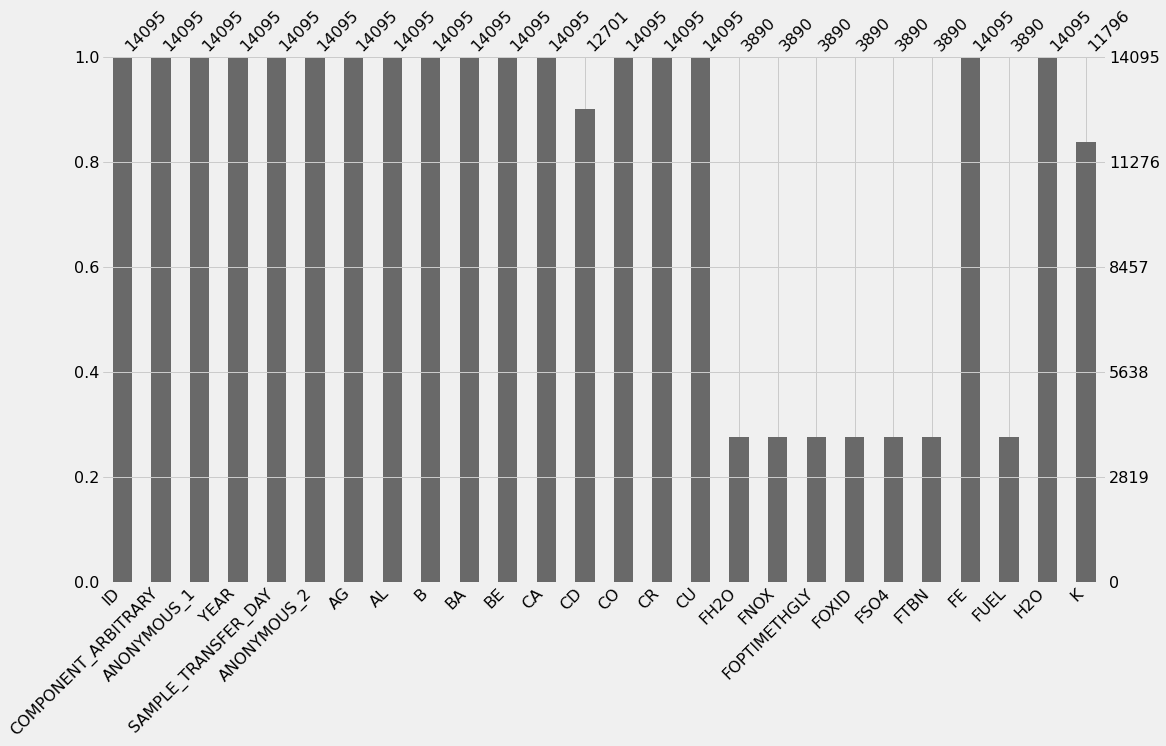

In [25]:
# 0~25 columns missing data
msno.bar(oil.iloc[:, :26], figsize=(16,9))

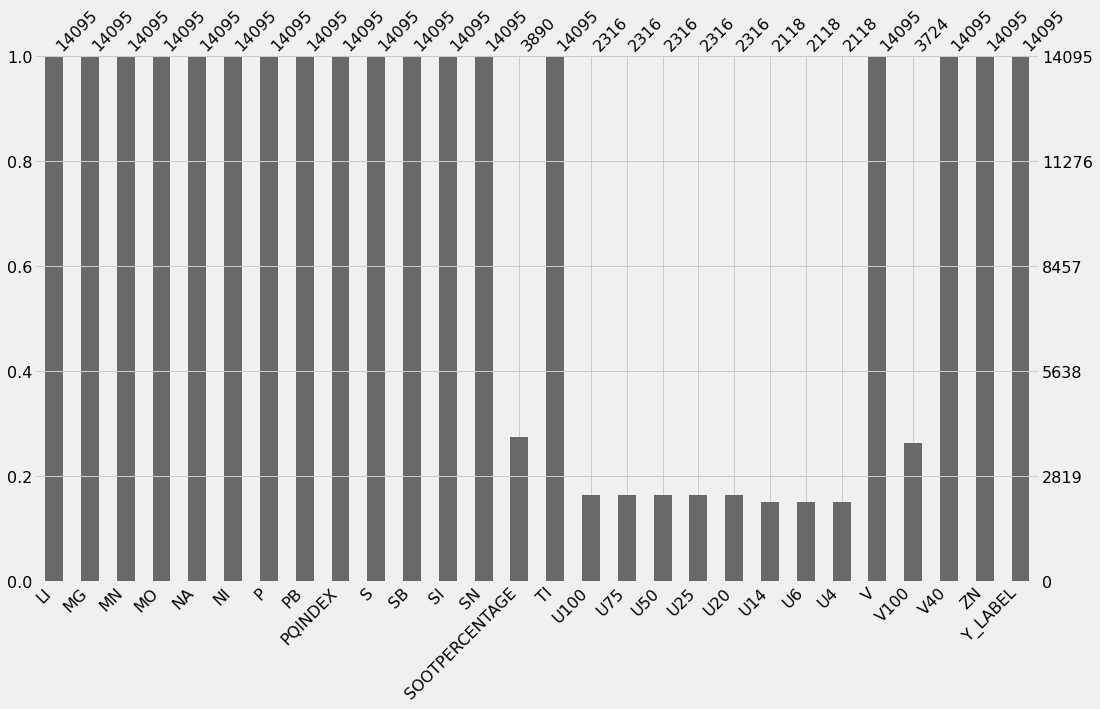

In [26]:
# 26~53 columns missing data
msno.bar(oil.iloc[:, 26:], figsize=(16,9))

In [27]:
oil_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6041 entries, 0 to 6040
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6041 non-null   object 
 1   COMPONENT_ARBITRARY  6041 non-null   object 
 2   ANONYMOUS_1          6041 non-null   int64  
 3   YEAR                 6041 non-null   int64  
 4   ANONYMOUS_2          6041 non-null   int64  
 5   AG                   6041 non-null   int64  
 6   CO                   6041 non-null   int64  
 7   CR                   6041 non-null   int64  
 8   CU                   6041 non-null   int64  
 9   FE                   6041 non-null   int64  
 10  H2O                  6041 non-null   float64
 11  MN                   6041 non-null   int64  
 12  MO                   6041 non-null   int64  
 13  NI                   6041 non-null   int64  
 14  PQINDEX              6041 non-null   int64  
 15  TI                   6041 non-null   i

In [28]:
oil.describe().round(4)

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
count,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,12701.0000,14095.0000,14095.0000,14095.0000,3890.0000,3890.0000,3890.0000,3890.0000,3890.0000,3890.0000,14095.0000,3890.0000,14095.0000,11796.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,3890.0000,14095.0000,2316.0000,2316.0000,2316.0000,2316.0000,2316.0000,2118.0000,2118.0000,2118.0000,14095.0000,3724.0000,14095.0000,14095.0000,14095.0000
mean,3146.0829,2013.6525,7.6006,387.4169,0.0258,12.7077,64.0262,0.6928,0.0063,1366.7576,0.0156,0.0282,3.2995,34.5606,15.2422,7.1383,0.5329,12.4954,20.2843,8.7832,178.1693,0.1853,0.0337,3.6112,0.2426,33.4775,2.7879,23.9924,3.9462,0.7301,909.6628,1.6594,415.1596,12029.3186,0.4770,35.0582,0.9098,0.6093,0.7079,0.1736,0.4171,6.1852,29.8709,56.0635,239.9381,5488.6931,19415.5973,0.0507,13.5762,109.3558,588.6468,0.0853
std,4216.0898,3.9648,11.6816,550.0161,0.1719,86.9680,102.8769,2.9055,0.1522,1481.9247,0.2094,0.3142,28.5955,128.9590,17.5917,1.8608,0.6219,3.4395,3.2343,1.3394,533.2090,0.8993,0.8092,15.6304,2.1901,116.5268,11.1318,59.8339,17.9143,3.8067,564.3890,10.3191,1528.1910,9325.6102,2.7299,195.3290,3.6043,0.6524,6.8976,0.8789,1.6263,36.6395,97.4596,184.3327,685.0535,15474.1463,40145.3114,0.4754,1.0737,49.6124,531.7434,0.2794
min,1000.0000,2007.0000,0.0000,200.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,3.0000,0.0000,4.0000,10.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,386.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.0000,154.0000,0.0000,5.2000,2.9000,0.0000,0.0000
25%,1655.0000,2010.0000,3.0000,200.0000,0.0000,1.0000,3.0000,0.0000,0.0000,48.0000,0.0000,0.0000,0.0000,1.0000,11.0000,6.0000,0.0000,10.0000,18.0000,8.1000,14.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,448.0000,0.0000,12.0000,4440.5000,0.0000,3.0000,0.0000,0.2000,0.0000,0.0000,0.0000,0.0000,3.0000,5.0000,22.0000,636.7500,5409.2500,0.0000,12.9000,71.8000,37.0000,0.0000
50%,2227.0000,2014.0000,5.0000,200.0000,0.0000,2.0000,11.0000,0.0000,0.0000,198.0000,0.0000,0.0000,1.0000,4.0000,13.0000,7.0000,0.0000,12.0000,20.0000,8.7000,41.0000,0.0000,0.0000,2.0000,0.0000,6.0000,1.0000,1.0000,2.0000,0.0000,916.0000,0.0000,29.0000,8034.0000,0.0000,6.0000,0.0000,0.4000,0.0000,0.0000,0.0000,1.0000,7.0000,13.0000,57.0000,1753.0000,12691.5000,0.0000,13.5000,111.3000,520.0000,0.0000
75%,3797.0000,2017.0000,8.0000,410.0000,0.0000,4.0000,110.0000,0.0000,0.0000,2975.0000,0.0000,0.0000,3.0000,17.0000,15.0000,8.0000,1.0000,14.7500,22.0000,9.6000,139.0000,0.0000,0.0000,3.0000,0.0000,13.0000,2.0000,7.0000,4.0000,0.0000,1101.0000,2.0000,181.0000,19750.0000,0.0000,12.0000,1.0000,0.8000,0.0000,0.0000,0.0000,3.0000,23.0000,39.2500,189.0000,5517.7500,24535.7500,0.0000,14.2000,137.2000,1119.0000,0.0000
max,294451.0000,2022.0000,368.0000,9650.0000,3.0000,4630.0000,2051.0000,216.0000,9.0000,6609.0000,18.0000,27.0000,2398.0000,5701.0000,320.0000,38.0000,13.0000,68.0000,68.0000,27.7000,31706.0000,12.0000,52.7000,705.0000,117.0000,1509.0000,877.0000,419.0000,1212.0000,176.0000,3102.0000,736.0000,56761.0000,64160.0000,103.0000,5459.0000,289.0000,6.5000,403.0000,18.0000,33.0000,939.0000,1651.0000,2932.0000,11296.0000,412627.0000,844421.0000,17.0000,29.9000,2840.5000,2132.0000,1.0000


In [29]:
oil.describe(include = 'O')

,ID,COMPONENT_ARBITRARY
count,14095,14095
unique,14095,4
top,TRAIN_00000,COMPONENT3
freq,1,7050


In [30]:
oil.groupby(['COMPONENT_ARBITRARY']).mean()

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
COMPONENT_ARBITRARY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
COMPONENT1,3046.162468,2013.729563,7.731620,392.906170,0.025193,10.285861,62.665553,0.643445,0.012596,1397.478406,0.009562,0.014396,1.910540,9.929563,15.242159,7.138303,0.532905,12.495373,20.284319,8.783239,27.057069,0.185347,0.002699,4.441887,0.049871,88.110283,0.514910,69.364267,4.558612,0.152185,990.632905,3.343702,20.422622,5911.101028,0.386375,9.761183,2.056812,0.609254,0.055013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024422,13.57623,102.678103,1161.010283,0.080206
COMPONENT2,3023.936097,2013.718912,7.530225,383.064335,0.024180,18.402850,61.961572,0.780656,0.003454,1332.214162,0.006566,0.009499,0.515976,56.677029,NaN,NaN,NaN,NaN,NaN,NaN,18.890328,NaN,0.003282,1.101607,0.168826,4.154577,0.155872,0.652418,0.810017,0.027634,386.510363,0.686097,27.230570,3559.502591,0.305268,3.558290,0.185665,NaN,0.032815,0.173575,0.417098,6.185233,29.870898,56.063472,239.938149,5488.693107,19415.597262,0.010794,NaN,52.720695,505.785838,0.088946
COMPONENT3,3227.621986,2013.494043,7.700426,381.766667,0.028227,12.999007,65.379858,0.703972,0.004539,1315.180567,0.020836,0.044397,5.361986,32.252057,NaN,NaN,NaN,NaN,NaN,NaN,332.500426,NaN,0.064525,4.180489,0.376312,9.400000,5.137163,3.415745,3.935035,1.362553,1025.357589,0.619149,807.300567,18995.060567,0.602837,62.982270,0.594043,NaN,1.372908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082837,NaN,136.411370,241.379574,0.090071
COMPONENT4,3261.377831,2014.443385,6.348033,421.458880,0.013111,5.767580,64.659118,0.585221,0.000000,1753.070322,0.018421,0.007151,0.091776,107.109654,NaN,NaN,NaN,NaN,NaN,NaN,21.651967,NaN,0.001549,2.600559,0.215733,63.438617,0.852205,50.958284,9.858164,0.034565,1006.205006,5.277712,21.091776,5244.431466,0.313468,4.659118,0.244338,NaN,0.010727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011919,NaN,69.310012,1081.669845,0.059595


In [31]:
oil_test.describe()

,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
count,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000
mean,3199.140871,2013.656514,392.669922,0.026817,0.030790,3.155438,37.397285,198.615295,0.024599,3.127462,25.042212,0.883463,475.091210,0.797219,0.044529,110.495135,581.186393
std,4834.849930,3.976759,563.705290,0.179981,0.268141,21.120731,153.922102,690.985612,0.335461,11.315785,62.245538,5.708857,1812.652841,7.366433,0.359595,45.381679,530.799040
min,1000.000000,2007.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.900000,1.000000
25%,1667.000000,2010.000000,200.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,73.000000,38.000000
50%,2271.000000,2014.000000,200.000000,0.000000,0.000000,1.000000,4.000000,41.000000,0.000000,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,112.100000,489.000000
75%,3842.000000,2017.000000,417.000000,0.000000,0.000000,2.000000,17.000000,143.000000,0.000000,2.000000,8.000000,0.000000,173.000000,0.000000,0.000000,138.200000,1115.000000
max,239570.000000,2022.000000,9650.000000,2.000000,13.000000,1415.000000,4113.000000,30407.000000,15.200000,472.000000,765.000000,155.000000,48976.000000,280.000000,13.000000,388.400000,1932.000000


In [32]:
oil_test.describe(include = 'O')

,ID,COMPONENT_ARBITRARY
count,6041,6041
unique,6041,4
top,TEST_0000,COMPONENT3
freq,1,3021


In [33]:
oil_test.groupby(['COMPONENT_ARBITRARY']).mean()

,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
COMPONENT_ARBITRARY,,,,,,,,,,,,,,,,,
COMPONENT1,2991.527894,2013.782843,390.224955,0.025795,0.012597,2.046791,10.575285,29.414517,0.003599,0.657469,72.391722,0.166767,26.732454,0.094181,0.028194,102.691950,1160.566887
COMPONENT2,3650.053374,2013.864048,399.089627,0.022155,0.016113,0.515609,53.348439,18.659617,0.006445,0.160121,0.590131,0.027190,29.644512,0.035247,0.009063,53.815086,498.013092
COMPONENT3,3132.428004,2013.406157,383.939093,0.030122,0.047997,4.998676,38.900695,372.383317,0.045084,5.720622,4.248593,1.661039,923.324727,1.529295,0.068520,138.342784,228.999007
COMPONENT4,3476.569444,2014.600000,459.550000,0.016667,0.011111,0.102778,104.983333,20.283333,0.000000,0.988889,47.727778,0.038889,18.505556,0.011111,0.016667,69.282500,1083.191667


In [34]:
oil_features = oil.columns

In [35]:
sns.set_theme(context='notebook', style='whitegrid', font_scale=1.2)

In [36]:
plt.rcParams["figure.figsize"] = (16,9)

# Y_LABEL

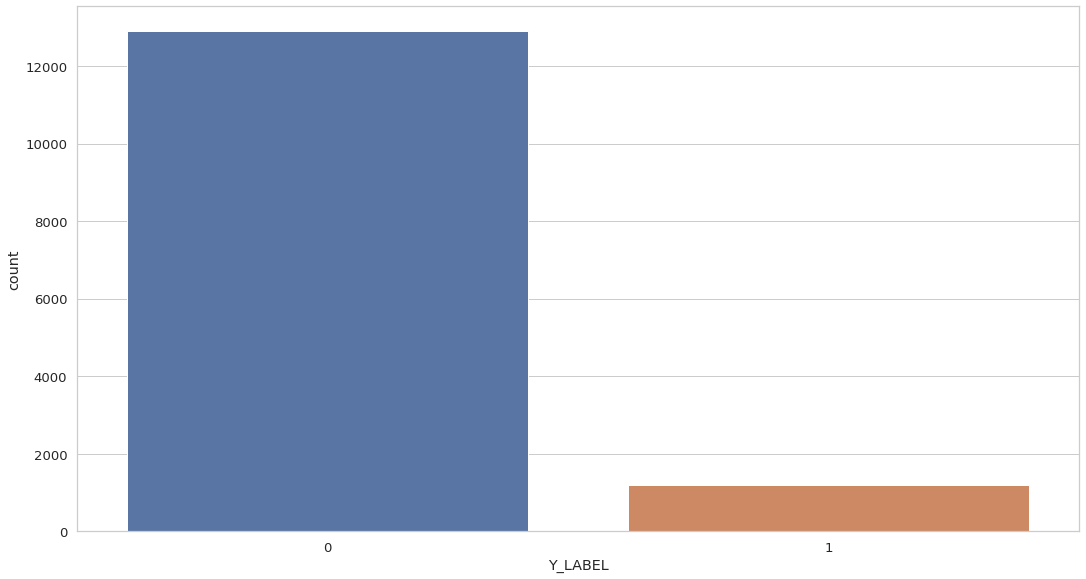

In [37]:
sns.countplot(data=oil, x='Y_LABEL')

In [41]:
oil.Y_LABEL.value_counts()

0    12892
1     1203
Name: Y_LABEL, dtype: int64

In [42]:
# ratio of target 0
(oil.Y_LABEL.value_counts()[0] / oil.shape[0]).round(3)

0.915

In [43]:
# ratio of target 1
(oil.Y_LABEL.value_counts()[1] / oil.shape[0]).round(3)

0.085

###3.2.2 COMPONENT_ARBITRARY

In [44]:
oil['COMPONENT_ARBITRARY'].value_counts()

COMPONENT3    7050
COMPONENT1    3890
COMPONENT2    2316
COMPONENT4     839
Name: COMPONENT_ARBITRARY, dtype: int64

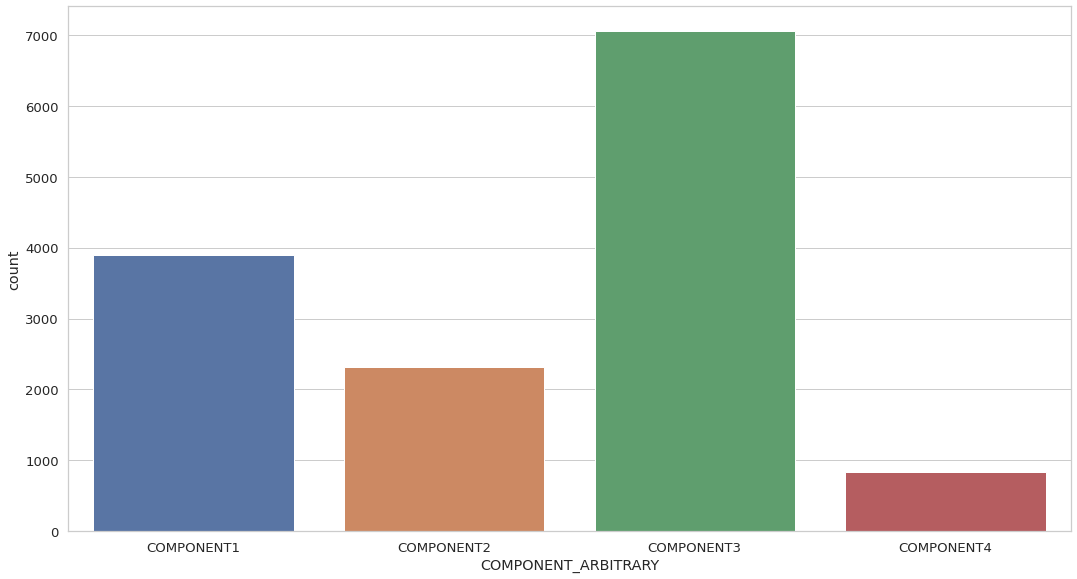

In [45]:
sns.countplot(data = oil, x='COMPONENT_ARBITRARY', 
              order = ['COMPONENT1', 'COMPONENT2', 'COMPONENT3', 'COMPONENT4'])

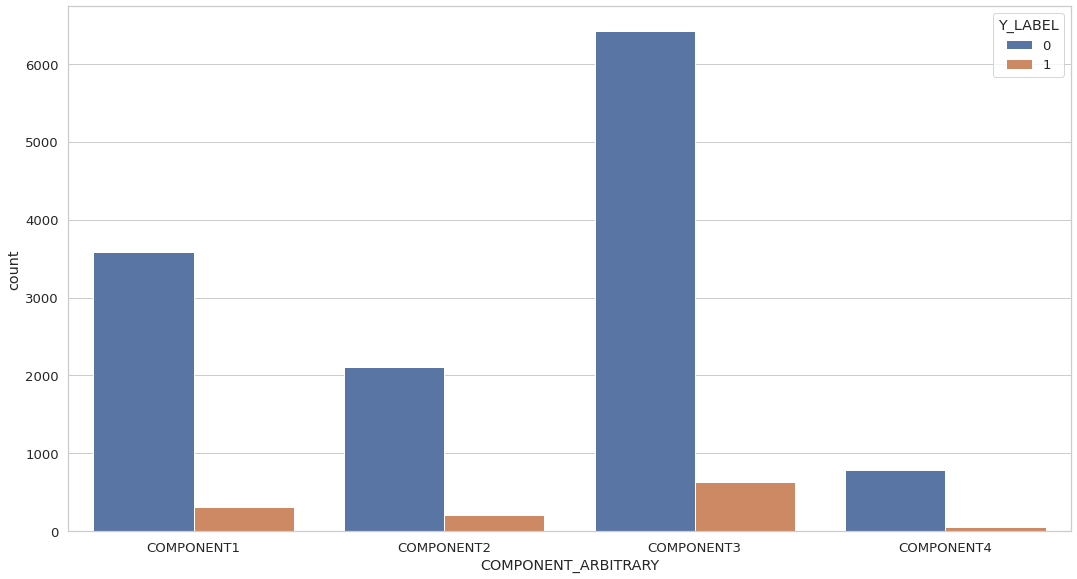

In [46]:
sns.countplot(data = oil, x='COMPONENT_ARBITRARY', hue='Y_LABEL',
              order = ['COMPONENT1', 'COMPONENT2', 'COMPONENT3', 'COMPONENT4'])

#4.Data Preprocessing

##4.1 Train Test Data Concatenating

In [47]:
oil_features = oil.columns

In [48]:
oil_test_features = oil_test.columns

In [49]:
all_data = pd.concat([oil, oil_test], ignore_index=True)

In [50]:
all_data

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7.0,200,0,3.0,93.0,0.0,0.0,3059.0,0.0,0,13,78,NaN,NaN,NaN,NaN,NaN,NaN,888,NaN,0.0,27.0,1.0,14.0,16,1,16.0,6,1951.0,0.0,8504,21370.0,0.0,427.0,2.0,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0.0
1,TRAIN_00001,COMPONENT2,1350,2021,51.0,375,0,2.0,19.0,0.0,0.0,2978.0,0.0,0,0,31,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,NaN,0.0,1.0,0,0,1.0,0,572.0,2.0,19,1117.0,0.0,0.0,0.0,NaN,0,0.0,0.0,1.0,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0.0
2,TRAIN_00002,COMPONENT2,2415,2015,2.0,200,0,110.0,1.0,1.0,0.0,17.0,0.0,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,0.0,0.0,0.0,0.0,0,0,2.0,0,328.0,0.0,17,1334.0,0.0,0.0,1.0,NaN,0,0.0,0.0,0.0,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1.0
3,TRAIN_00003,COMPONENT3,7389,2010,2.0,200,0,8.0,3.0,0.0,0.0,1960.0,0.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,0.0,NaN,0.0,4.0,1,0,0.0,0,906.0,1.0,44,21774.0,2.0,1.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0.0
4,TRAIN_00004,COMPONENT3,3954,2015,4.0,200,0,1.0,157.0,0.0,0.0,71.0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,0.0,0.0,0.0,0.0,0,0,2.0,0,309.0,0.0,217,18470.0,0.0,2.0,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,TEST_6036,COMPONENT3,1714,2014,NaN,200,0,NaN,NaN,NaN,NaN,NaN,NaN,0,3,130,NaN,NaN,NaN,NaN,NaN,NaN,1047,NaN,0.0,NaN,NaN,NaN,65,5,NaN,2,NaN,NaN,1999,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,71.2,1163,NaN
20132,TEST_6037,COMPONENT3,4131,2016,NaN,200,0,NaN,NaN,NaN,NaN,NaN,NaN,0,5,2,NaN,NaN,NaN,NaN,NaN,NaN,736,NaN,0.0,NaN,NaN,NaN,5,0,NaN,0,NaN,NaN,693,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,137.8,13,NaN
20133,TEST_6038,COMPONENT3,4325,2014,NaN,200,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,53,NaN,0.0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,69,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,302.2,13,NaN
20134,TEST_6039,COMPONENT2,1364,2013,NaN,200,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,62,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,51.1,478,NaN


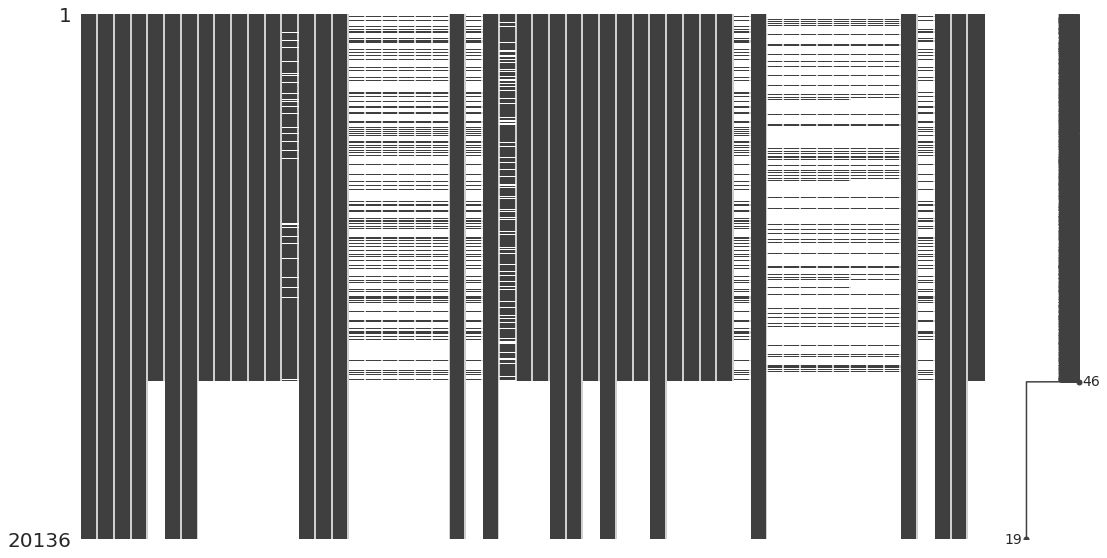

In [51]:
# all_data missing value matrix
msno.matrix(all_data, figsize=(16,9))

##5.2 Drop Columns

In [52]:
all_data = all_data.drop(['ID','Y_LABEL'], axis=1)

In [53]:
all_data

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN
0,COMPONENT3,1486,2011,7.0,200,0,3.0,93.0,0.0,0.0,3059.0,0.0,0,13,78,NaN,NaN,NaN,NaN,NaN,NaN,888,NaN,0.0,27.0,1.0,14.0,16,1,16.0,6,1951.0,0.0,8504,21370.0,0.0,427.0,2.0,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75
1,COMPONENT2,1350,2021,51.0,375,0,2.0,19.0,0.0,0.0,2978.0,0.0,0,0,31,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,NaN,0.0,1.0,0,0,1.0,0,572.0,2.0,19,1117.0,0.0,0.0,0.0,NaN,0,0.0,0.0,1.0,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652
2,COMPONENT2,2415,2015,2.0,200,0,110.0,1.0,1.0,0.0,17.0,0.0,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,0.0,0.0,0.0,0.0,0,0,2.0,0,328.0,0.0,17,1334.0,0.0,0.0,1.0,NaN,0,0.0,0.0,0.0,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412
3,COMPONENT3,7389,2010,2.0,200,0,8.0,3.0,0.0,0.0,1960.0,0.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,0.0,NaN,0.0,4.0,1,0,0.0,0,906.0,1.0,44,21774.0,2.0,1.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7
4,COMPONENT3,3954,2015,4.0,200,0,1.0,157.0,0.0,0.0,71.0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,0.0,0.0,0.0,0.0,0,0,2.0,0,309.0,0.0,217,18470.0,0.0,2.0,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,COMPONENT3,1714,2014,NaN,200,0,NaN,NaN,NaN,NaN,NaN,NaN,0,3,130,NaN,NaN,NaN,NaN,NaN,NaN,1047,NaN,0.0,NaN,NaN,NaN,65,5,NaN,2,NaN,NaN,1999,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,71.2,1163
20132,COMPONENT3,4131,2016,NaN,200,0,NaN,NaN,NaN,NaN,NaN,NaN,0,5,2,NaN,NaN,NaN,NaN,NaN,NaN,736,NaN,0.0,NaN,NaN,NaN,5,0,NaN,0,NaN,NaN,693,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,137.8,13
20133,COMPONENT3,4325,2014,NaN,200,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,53,NaN,0.0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,69,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,302.2,13
20134,COMPONENT2,1364,2013,NaN,200,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,62,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,51.1,478


##5.3 One-Hot Encoding

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
encoder = OneHotEncoder(sparse=False)

In [56]:
encoded_data = encoder.fit_transform(all_data[['COMPONENT_ARBITRARY']])

In [57]:
encoded_data

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [58]:
encoded_df = pd.DataFrame(encoded_data, columns = ['COMPONENT_ARBITRARY_' + str(num) for num in range(4)])

In [59]:
all_data = all_data.drop('COMPONENT_ARBITRARY', axis=1)

In [60]:
all_data = pd.concat([all_data, encoded_df], axis=1)

In [61]:
all_data

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,COMPONENT_ARBITRARY_0,COMPONENT_ARBITRARY_1,COMPONENT_ARBITRARY_2,COMPONENT_ARBITRARY_3
0,1486,2011,7.0,200,0,3.0,93.0,0.0,0.0,3059.0,0.0,0,13,78,NaN,NaN,NaN,NaN,NaN,NaN,888,NaN,0.0,27.0,1.0,14.0,16,1,16.0,6,1951.0,0.0,8504,21370.0,0.0,427.0,2.0,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0.0,0.0,1.0,0.0
1,1350,2021,51.0,375,0,2.0,19.0,0.0,0.0,2978.0,0.0,0,0,31,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,NaN,0.0,1.0,0,0,1.0,0,572.0,2.0,19,1117.0,0.0,0.0,0.0,NaN,0,0.0,0.0,1.0,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0.0,1.0,0.0,0.0
2,2415,2015,2.0,200,0,110.0,1.0,1.0,0.0,17.0,0.0,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,0.0,0.0,0.0,0.0,0,0,2.0,0,328.0,0.0,17,1334.0,0.0,0.0,1.0,NaN,0,0.0,0.0,0.0,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,0.0,1.0,0.0,0.0
3,7389,2010,2.0,200,0,8.0,3.0,0.0,0.0,1960.0,0.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,0.0,NaN,0.0,4.0,1,0,0.0,0,906.0,1.0,44,21774.0,2.0,1.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0.0,0.0,1.0,0.0
4,3954,2015,4.0,200,0,1.0,157.0,0.0,0.0,71.0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,0.0,0.0,0.0,0.0,0,0,2.0,0,309.0,0.0,217,18470.0,0.0,2.0,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,1714,2014,NaN,200,0,NaN,NaN,NaN,NaN,NaN,NaN,0,3,130,NaN,NaN,NaN,NaN,NaN,NaN,1047,NaN,0.0,NaN,NaN,NaN,65,5,NaN,2,NaN,NaN,1999,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,71.2,1163,0.0,0.0,1.0,0.0
20132,4131,2016,NaN,200,0,NaN,NaN,NaN,NaN,NaN,NaN,0,5,2,NaN,NaN,NaN,NaN,NaN,NaN,736,NaN,0.0,NaN,NaN,NaN,5,0,NaN,0,NaN,NaN,693,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,137.8,13,0.0,0.0,1.0,0.0
20133,4325,2014,NaN,200,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,53,NaN,0.0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,69,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,302.2,13,0.0,0.0,1.0,0.0
20134,1364,2013,NaN,200,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,62,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,51.1,478,0.0,1.0,0.0,0.0


##5.6 Missing Value Manipulate

In [62]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20136 entries, 0 to 20135
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ANONYMOUS_1            20136 non-null  int64  
 1   YEAR                   20136 non-null  int64  
 2   SAMPLE_TRANSFER_DAY    14095 non-null  float64
 3   ANONYMOUS_2            20136 non-null  int64  
 4   AG                     20136 non-null  int64  
 5   AL                     14095 non-null  float64
 6   B                      14095 non-null  float64
 7   BA                     14095 non-null  float64
 8   BE                     14095 non-null  float64
 9   CA                     14095 non-null  float64
 10  CD                     12701 non-null  float64
 11  CO                     20136 non-null  int64  
 12  CR                     20136 non-null  int64  
 13  CU                     20136 non-null  int64  
 14  FH2O                   3890 non-null   float64
 15  FN

In [63]:
def get_missing_info(all_data):

    mean_list = []
    zero_list = []

    for x in all_data.columns:

        if len(x) > 10000:
            mean_list.append(x)

        else:
            zero_list.append(x)

    return mean_list, zero_list

In [64]:
mean_list, zero_list = get_missing_info(all_data)

In [65]:
for col in zero_list:
    all_data.fillna({col:0}, inplace=True)

In [66]:
for col in mean_list:
    all_data.fillna({col:oil[col].mean()}, inplace=True)    

In [67]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20136 entries, 0 to 20135
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ANONYMOUS_1            20136 non-null  int64  
 1   YEAR                   20136 non-null  int64  
 2   SAMPLE_TRANSFER_DAY    20136 non-null  float64
 3   ANONYMOUS_2            20136 non-null  int64  
 4   AG                     20136 non-null  int64  
 5   AL                     20136 non-null  float64
 6   B                      20136 non-null  float64
 7   BA                     20136 non-null  float64
 8   BE                     20136 non-null  float64
 9   CA                     20136 non-null  float64
 10  CD                     20136 non-null  float64
 11  CO                     20136 non-null  int64  
 12  CR                     20136 non-null  int64  
 13  CU                     20136 non-null  int64  
 14  FH2O                   20136 non-null  float64
 15  FN

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(all_data)
all_data = pd.DataFrame(scaled, columns = all_data.columns)
all_data

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,COMPONENT_ARBITRARY_0,COMPONENT_ARBITRARY_1,COMPONENT_ARBITRARY_2,COMPONENT_ARBITRARY_3
0,0.001656,0.266667,0.019022,0.000000,0.000000,0.000648,0.045344,0.00000,0.0,0.462854,0.0,0.0,0.005421,0.013682,0.0,0.0,0.0,0.0,0.0,0.0,0.028007,0.0,0.0,0.038298,0.008547,0.009278,0.018244,0.001307,0.013201,0.034091,0.628949,0.000000,0.149821,0.333074,0.000000,0.078219,0.00692,0.0,0.012407,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.053249,0.035178,0.0,0.0,1.0,0.0
1,0.001193,0.933333,0.138587,0.018519,0.000000,0.000432,0.009264,0.00000,0.0,0.450598,0.0,0.0,0.000000,0.005438,0.0,0.0,0.0,0.0,0.0,0.0,0.000063,0.0,0.0,0.000000,0.000000,0.000663,0.000000,0.000000,0.000825,0.000000,0.184397,0.002717,0.000335,0.017410,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.001065,0.001211,0.001364,0.000531,0.000523,0.001722,0.0,0.0,0.014484,0.305816,0.0,1.0,0.0,0.0
2,0.004822,0.533333,0.005435,0.000000,0.000000,0.023758,0.000488,0.00463,0.0,0.002572,0.0,0.0,0.000417,0.000351,0.0,0.0,0.0,0.0,0.0,0.0,0.000126,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001650,0.000000,0.105738,0.000000,0.000300,0.020792,0.000000,0.000000,0.00346,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.001023,0.003453,0.027291,0.048650,0.0,0.0,0.024563,0.193246,0.0,1.0,0.0,0.0
3,0.021772,0.200000,0.005435,0.000000,0.000000,0.001728,0.001463,0.00000,0.0,0.296565,0.0,0.0,0.000000,0.000175,0.0,0.0,0.0,0.0,0.0,0.0,0.001167,0.0,0.0,0.000000,0.000000,0.002651,0.001140,0.000000,0.000000,0.000000,0.292070,0.001359,0.000775,0.339370,0.019417,0.000183,0.00346,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.045954,0.003283,0.0,0.0,1.0,0.0
4,0.010066,0.533333,0.010870,0.000000,0.000000,0.000216,0.076548,0.00000,0.0,0.010743,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.002239,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001650,0.000000,0.099613,0.000000,0.003823,0.287874,0.000000,0.000366,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.045884,0.060038,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,0.002433,0.466667,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.001251,0.022803,0.0,0.0,0.0,0.0,0.0,0.0,0.033022,0.0,0.0,0.000000,0.000000,0.000000,0.074116,0.006536,0.000000,0.011364,0.000000,0.000000,0.035218,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.024070,0.545497,0.0,0.0,1.0,0.0
20132,0.010670,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.002085,0.000351,0.0,0.0,0.0,0.0,0.0,0.0,0.023213,0.0,0.0,0.000000,0.000000,0.000000,0.005701,0.000000,0.000000,0.000000,0.000000,0.000000,0.012209,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.047540,0.006098,0.0,0.0,1.0,0.0
20133,0.011331,0.466667,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001672,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001216,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.105476,0.006098,0.0,0.0,1.0,0.0
20134,0.001240,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.010875,0.0,0.0,0.0,0.0,0.0,0.0,0.000063,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000088,0.000000,0.000000,0.000000,0.000

##5.7 Train Test Data Splitting

In [69]:
num = len(oil)
labeled = oil.Y_LABEL
df = all_data[:num]
df_test = all_data[num:]

In [70]:
df['Y_LABEL'] = labeled
df

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,COMPONENT_ARBITRARY_0,COMPONENT_ARBITRARY_1,COMPONENT_ARBITRARY_2,COMPONENT_ARBITRARY_3,Y_LABEL
0,0.001656,0.266667,0.019022,0.000000,0.0,0.000648,0.045344,0.00000,0.0,0.462854,0.0,0.0,0.005421,0.013682,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.028007,0.0,0.0,0.038298,0.008547,0.009278,0.018244,0.001307,0.013201,0.034091,0.628949,0.000000,0.149821,0.333074,0.000000,0.078219,0.00692,0.000000,0.012407,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.053249,0.035178,0.0,0.0,1.0,0.0,0
1,0.001193,0.933333,0.138587,0.018519,0.0,0.000432,0.009264,0.00000,0.0,0.450598,0.0,0.0,0.000000,0.005438,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000063,0.0,0.0,0.000000,0.000000,0.000663,0.000000,0.000000,0.000825,0.000000,0.184397,0.002717,0.000335,0.017410,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.001065,0.001211,0.001364,0.000531,0.000523,0.001722,0.0,0.00000,0.014484,0.305816,0.0,1.0,0.0,0.0,0
2,0.004822,0.533333,0.005435,0.000000,0.0,0.023758,0.000488,0.00463,0.0,0.002572,0.0,0.0,0.000417,0.000351,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000126,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001650,0.000000,0.105738,0.000000,0.000300,0.020792,0.000000,0.000000,0.00346,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.001023,0.003453,0.027291,0.048650,0.0,0.00000,0.024563,0.193246,0.0,1.0,0.0,0.0,1
3,0.021772,0.200000,0.005435,0.000000,0.0,0.001728,0.001463,0.00000,0.0,0.296565,0.0,0.0,0.000000,0.000175,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.001167,0.0,0.0,0.000000,0.000000,0.002651,0.001140,0.000000,0.000000,0.000000,0.292070,0.001359,0.000775,0.339370,0.019417,0.000183,0.00346,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.045954,0.003283,0.0,0.0,1.0,0.0,0
4,0.010066,0.533333,0.010870,0.000000,0.0,0.000216,0.076548,0.00000,0.0,0.010743,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.002239,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001650,0.000000,0.099613,0.000000,0.003823,0.287874,0.000000,0.000366,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.045884,0.060038,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,0.002099,0.466667,0.021739,0.000000,0.0,0.000432,0.098001,0.00463,0.0,0.000908,0.0,0.0,0.000000,0.000526,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000725,0.0,0.0,0.001418,0.000000,0.000000,0.000000,0.000000,0.006601,0.000000,0.153772,0.000000,0.000617,0.342893,0.000000,0.000366,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.046694,0.007505,0.0,0.0,1.0,0.0,0
14091,0.006079,0.400000,0.005435,0.000000,0.0,0.000648,0.041443,0.00000,0.0,0.445604,0.0,0.0,0.000000,0.000351,0.040625,0.210526,0.0,0.235294,0.308824,0.32852,0.000378,0.0,0.0,0.005674,0.000000,0.023857,0.000000,0.292810,0.002475,0.000000,0.374919,0.001359,0.000159,0.085630,0.000000,0.000916,0.00000,0.061538,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.48495,0.040386,0.660413,1.0,0.0,0.0,0.0,0
14092,0.002685,0.066667,0.024457,0.037037,0.0,0.001296,0.000000,0.00463,0.0,0.001967,0.0,0.0,0.001668,0.001228,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.013089,0.0,0.0,0.000000,0.008547,0.010603,0.007982,0.013072,0.002475,0.005682,0.378788,0.001359,0.011363,0.150249,0.019417,0.003297,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.018008,0.610225,0.0,0.0,1.0,0.0,0
14093,0.005105,0.133333,0.0

In [71]:
df_test

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,COMPONENT_ARBITRARY_0,COMPONENT_ARBITRARY_1,COMPONENT_ARBITRARY_2,COMPONENT_ARBITRARY_3
14095,0.004062,0.600000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000175,0.0,0.0,0.0,0.0,0.0,0.0,0.000378,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000176,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031153,0.511726,1.0,0.0,0.0,0.0
14096,0.006113,0.266667,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000834,0.000175,0.0,0.0,0.0,0.0,0.0,0.0,0.008768,0.0,0.0,0.0,0.0,0.0,0.003421,0.000000,0.0,0.000000,0.0,0.0,0.048132,0.0,0.0,0.0,0.0,0.0,0.002481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043699,0.005629,0.0,0.0,1.0,0.0
14097,0.003346,0.200000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002807,0.0,0.0,0.0,0.0,0.0,0.0,0.000158,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000194,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014590,0.334897,0.0,1.0,0.0,0.0
14098,0.001377,0.133333,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001251,0.000702,0.0,0.0,0.0,0.0,0.0,0.0,0.005141,0.0,0.0,0.0,0.0,0.0,0.004561,0.003922,0.0,0.000000,0.0,0.0,0.141065,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049302,0.044090,0.0,0.0,1.0,0.0
14099,0.024621,0.400000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001052,0.0,0.0,0.0,0.0,0.0,0.0,0.000410,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000282,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021321,0.219981,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,0.002433,0.466667,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001251,0.022803,0.0,0.0,0.0,0.0,0.0,0.0,0.033022,0.0,0.0,0.0,0.0,0.0,0.074116,0.006536,0.0,0.011364,0.0,0.0,0.035218,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024070,0.545497,0.0,0.0,1.0,0.0
20132,0.010670,0.600000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002085,0.000351,0.0,0.0,0.0,0.0,0.0,0.0,0.023213,0.0,0.0,0.0,0.0,0.0,0.005701,0.000000,0.0,0.000000,0.0,0.0,0.012209,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047540,0.006098,0.0,0.0,1.0,0.0
20133,0.011331,0.466667,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001672,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.001216,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105476,0.006098,0.0,0.0,1.0,0.0
20134,0.001240,0.400000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.010875,0.0,0.0,0.0,0.0,0.0,0.0,0.000063,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000088,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016986,0.224203,0.0,1.0,0.0,0.0


In [72]:
df_test = df_test[['ANONYMOUS_1', 'YEAR', 'ANONYMOUS_2', 'AG',
       'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V',
       'V40', 'ZN', 'COMPONENT_ARBITRARY_0', 'COMPONENT_ARBITRARY_1', 
       'COMPONENT_ARBITRARY_2', 'COMPONENT_ARBITRARY_3' ]]

In [73]:
df_test

,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN,COMPONENT_ARBITRARY_0,COMPONENT_ARBITRARY_1,COMPONENT_ARBITRARY_2,COMPONENT_ARBITRARY_3
14095,0.004062,0.600000,0.000000,0.000000,0.0,0.000000,0.000175,0.000378,0.0,0.000000,0.000000,0.000000,0.000176,0.000000,0.0,0.031153,0.511726,1.0,0.0,0.0,0.0
14096,0.006113,0.266667,0.000000,0.000000,0.0,0.000834,0.000175,0.008768,0.0,0.003421,0.000000,0.000000,0.048132,0.002481,0.0,0.043699,0.005629,0.0,0.0,1.0,0.0
14097,0.003346,0.200000,0.000000,0.000000,0.0,0.000000,0.002807,0.000158,0.0,0.000000,0.000000,0.000000,0.000194,0.000000,0.0,0.014590,0.334897,0.0,1.0,0.0,0.0
14098,0.001377,0.133333,0.000000,0.000000,0.0,0.001251,0.000702,0.005141,0.0,0.004561,0.003922,0.000000,0.141065,0.000000,0.0,0.049302,0.044090,0.0,0.0,1.0,0.0
14099,0.024621,0.400000,0.000000,0.000000,0.0,0.000000,0.001052,0.000410,0.0,0.000000,0.000000,0.000000,0.000282,0.000000,0.0,0.021321,0.219981,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,0.002433,0.466667,0.000000,0.000000,0.0,0.001251,0.022803,0.033022,0.0,0.074116,0.006536,0.011364,0.035218,0.000000,0.0,0.024070,0.545497,0.0,0.0,1.0,0.0
20132,0.010670,0.600000,0.000000,0.000000,0.0,0.002085,0.000351,0.023213,0.0,0.005701,0.000000,0.000000,0.012209,0.000000,0.0,0.047540,0.006098,0.0,0.0,1.0,0.0
20133,0.011331,0.466667,0.000000,0.000000,0.0,0.000000,0.000000,0.001672,0.0,0.000000,0.000000,0.000000,0.001216,0.000000,0.0,0.105476,0.006098,0.0,0.0,1.0,0.0
20134,0.001240,0.400000,0.000000,0.000000,0.0,0.000000,0.010875,0.000063,0.0,0.000000,0.000000,0.000000,0.000088,0.000000,0.0,0.016986,0.224203,0.0,1.0,0.0,0.0


#5.Make Model and predict

##7.1 GBM model

In [74]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
gbm_model = GradientBoostingClassifier()
# teacher model
gbm_model.fit(df.iloc[:, :-1], df.iloc[:, -1])

GradientBoostingClassifier()

In [75]:
y_pred_prob = gbm_model.predict_proba(df.iloc[:, :-1])
y_pred_prob

array([[0.98875795, 0.01124205],
       [0.98378434, 0.01621566],
       [0.01373007, 0.98626993],
       ...,
       [0.83001754, 0.16998246],
       [0.93412229, 0.06587771],
       [0.98030013, 0.01969987]])

In [76]:
y_pred_prob.shape

(14095, 2)

In [77]:
gbm_model_regressor = GradientBoostingRegressor()
df_oil_sub = df[df_test.columns]
gbm_model_regressor.fit(df_oil_sub, y_pred_prob[:, 1])

GradientBoostingRegressor()

In [78]:
y_pred = gbm_model_regressor.predict(df_test)
submission.Y_LABEL = pd.Series(np.where(y_pred >=0.5, 1, 0))
submission

,ID,Y_LABEL
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
6036,TEST_6036,0
6037,TEST_6037,0
6038,TEST_6038,0
6039,TEST_6039,0


In [79]:
submission.Y_LABEL.value_counts()

0    6030
1      11
Name: Y_LABEL, dtype: int64

In [80]:
submission.loc[submission.Y_LABEL == 1]

,ID,Y_LABEL
648,TEST_0648,1
3440,TEST_3440,1
3640,TEST_3640,1
3793,TEST_3793,1
4483,TEST_4483,1
4623,TEST_4623,1
4848,TEST_4848,1
5311,TEST_5311,1
5373,TEST_5373,1
5644,TEST_5644,1


In [81]:
submission.to_csv(file_path + 'submission8.csv', index=False)

##7.2 XGBoost model

In [82]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(df.iloc[:, :-1], df.iloc[:, -1])

XGBClassifier()

In [83]:
y_pred_prob = xgb_model.predict_proba(df.iloc[:, :-1])
xgb_model_regressor = xgb.XGBRegressor()
xgb_model_regressor.fit(df_oil_sub, y_pred_prob[:, 1])

[09:47:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [84]:
y_pred = gbm_model_regressor.predict(df_test)
submission.Y_LABEL = pd.Series(np.where(y_pred >=0.5, 1, 0))
submission.Y_LABEL.value_counts()

0    6030
1      11
Name: Y_LABEL, dtype: int64

In [85]:
submission.loc[submission.Y_LABEL == 1]

,ID,Y_LABEL
648,TEST_0648,1
3440,TEST_3440,1
3640,TEST_3640,1
3793,TEST_3793,1
4483,TEST_4483,1
4623,TEST_4623,1
4848,TEST_4848,1
5311,TEST_5311,1
5373,TEST_5373,1
5644,TEST_5644,1


In [86]:
submission.to_csv(file_path + 'submission9.csv', index=False)

##7.3 LightGBM model

In [87]:
import lightgbm as lgbm
lgbm_model = lgbm.LGBMClassifier()
lgbm_model.fit(df.iloc[:, :-1], df.iloc[:, -1])

LGBMClassifier()

In [88]:
y_pred_prob = lgbm_model.predict_proba(df.iloc[:, :-1])
lgbm_model_regressor = lgbm.LGBMRegressor()
lgbm_model_regressor.fit(df_oil_sub, y_pred_prob[:, 1])

LGBMRegressor()

In [89]:
y_pred = lgbm_model_regressor.predict(df_test)
submission.Y_LABEL = pd.Series(np.where(y_pred >=0.5, 1, 0))
submission.Y_LABEL.value_counts()

0    6025
1      16
Name: Y_LABEL, dtype: int64

In [90]:
submission.loc[submission.Y_LABEL == 1]

,ID,Y_LABEL
90,TEST_0090,1
1513,TEST_1513,1
2279,TEST_2279,1
2852,TEST_2852,1
3389,TEST_3389,1
3440,TEST_3440,1
3640,TEST_3640,1
3793,TEST_3793,1
3802,TEST_3802,1
4483,TEST_4483,1


In [91]:
submission.to_csv(file_path + 'submission10.csv', index=False)

##7.4 CatBoost model

In [92]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 21 kB/s 


In [93]:
import catboost as cb
cb_model = cb.CatBoostClassifier()
cb_model.fit(df.iloc[:, :-1], df.iloc[:, -1])

Learning rate set to 0.031885
0:	learn: 0.6494622	total: 252ms	remaining: 4m 12s
1:	learn: 0.6093859	total: 409ms	remaining: 3m 24s
2:	learn: 0.5735542	total: 731ms	remaining: 4m 3s
3:	learn: 0.5406573	total: 900ms	remaining: 3m 44s
4:	learn: 0.5108452	total: 969ms	remaining: 3m 12s
5:	learn: 0.4816716	total: 1.03s	remaining: 2m 50s
6:	learn: 0.4564337	total: 1.08s	remaining: 2m 33s
7:	learn: 0.4330035	total: 1.11s	remaining: 2m 18s
8:	learn: 0.4123445	total: 1.17s	remaining: 2m 9s
9:	learn: 0.3922539	total: 1.22s	remaining: 2m
10:	learn: 0.3752603	total: 1.25s	remaining: 1m 52s
11:	learn: 0.3594867	total: 1.31s	remaining: 1m 47s
12:	learn: 0.3450877	total: 1.41s	remaining: 1m 47s
13:	learn: 0.3321970	total: 1.48s	remaining: 1m 44s
14:	learn: 0.3200579	total: 1.52s	remaining: 1m 40s
15:	learn: 0.3090754	total: 1.61s	remaining: 1m 38s
16:	learn: 0.2989999	total: 1.7s	remaining: 1m 38s
17:	learn: 0.2897882	total: 1.75s	remaining: 1m 35s
18:	learn: 0.2812460	total: 1.78s	remaining: 1m 31s

In [94]:
y_pred_prob = cb_model.predict_proba(df.iloc[:, :-1])
cb_model_regressor = cb.CatBoostRegressor()
cb_model_regressor.fit(df_oil_sub, y_pred_prob[:, 1])

Learning rate set to 0.062192
0:	learn: 0.2085088	total: 22.3ms	remaining: 22.2s
1:	learn: 0.2076695	total: 49.1ms	remaining: 24.5s
2:	learn: 0.2069096	total: 67.5ms	remaining: 22.4s
3:	learn: 0.2063767	total: 80.4ms	remaining: 20s
4:	learn: 0.2059071	total: 97.5ms	remaining: 19.4s
5:	learn: 0.2053253	total: 123ms	remaining: 20.4s
6:	learn: 0.2047885	total: 137ms	remaining: 19.5s
7:	learn: 0.2043308	total: 159ms	remaining: 19.7s
8:	learn: 0.2038559	total: 174ms	remaining: 19.1s
9:	learn: 0.2035661	total: 192ms	remaining: 19s
10:	learn: 0.2032411	total: 212ms	remaining: 19s
11:	learn: 0.2028263	total: 238ms	remaining: 19.6s
12:	learn: 0.2025198	total: 253ms	remaining: 19.2s
13:	learn: 0.2022888	total: 292ms	remaining: 20.5s
14:	learn: 0.2019609	total: 319ms	remaining: 20.9s
15:	learn: 0.2015819	total: 339ms	remaining: 20.9s
16:	learn: 0.2013002	total: 353ms	remaining: 20.4s
17:	learn: 0.2010835	total: 376ms	remaining: 20.5s
18:	learn: 0.2008930	total: 395ms	remaining: 20.4s
19:	learn: 0

In [95]:
y_pred = cb_model_regressor.predict(df_test)

In [96]:
submission.Y_LABEL = pd.Series(np.where(y_pred >=0.5, 1, 0))
submission.Y_LABEL.value_counts()

0    6022
1      19
Name: Y_LABEL, dtype: int64

In [97]:
submission.loc[submission.Y_LABEL == 1]

,ID,Y_LABEL
854,TEST_0854,1
1456,TEST_1456,1
1513,TEST_1513,1
1541,TEST_1541,1
2852,TEST_2852,1
3389,TEST_3389,1
3405,TEST_3405,1
3440,TEST_3440,1
3640,TEST_3640,1
3793,TEST_3793,1


In [98]:
submission.to_csv(file_path + 'submission11.csv', index=False)